In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import scipy
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
merged_data = pd.read_csv('/Users/munisabakhromova/Desktop/research/merged_data.csv')

merged_data.head()

/var/folders/f8/xf4k31p91fq6xlyklv8cjx3m0000gn/T/ipykernel_41021/3831768791.py:1: DtypeWarning: Columns (16,62,65,67,68,70,71,74,78,79,80,81,82,83,85,87,89,90,93,95,96,98,100,101,102,103,104,108,109,110,111,112,113,114,115,116,117,119,120,124,125,128,130,136,137,138,141,143,146,147,148,153,158,162,164,165,167,169,170,172,173,174,177,183,185,186,187,188,189,190,191,192,193,194,197,199,200,201,202,203,204,205,207,208,209,210,212,213,214,215,217,220,221,223,225,230,231,232,236,238,239,240,241,244,245,246,247,251,253,255,259,260,261,262,264,266,267,271,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,353,354,355,356,358,365,367,369,370,371,372,373,374,376,377,378,379,380,381,382,383,385,386,388,394,395,396,397,398,399,400,405,406,412,413,414,415,416,417,418,4

,country,isocode,ison,region,language,date,id_gallup,wgt_x,patience,risktaking,...,WP9701,WP9702,WP9704,WP98,WP9811,WP9896,WP99,WP9903,YEAR_CALENDAR,YEAR_WAVE
0,Turkey,TUR,792.00,Adana,Turkish,2012-03-07,7100800000001.00,0.27,0.05,1.02,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012
1,Turkey,TUR,792.00,Adana,Turkish,2012-03-08,7100800000002.00,0.27,-0.68,0.39,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012
2,Turkey,TUR,792.00,Adana,Turkish,2012-03-08,7100800000003.00,0.44,0.32,1.02,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012
3,Turkey,TUR,792.00,Adana,Turkish,2012-03-07,7100800000004.00,1.42,0.50,1.27,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012
4,Turkey,TUR,792.00,Adana,Turkish,2012-03-07,7100800000005.00,0.71,0.59,1.12,...,NaN,NaN,NaN,Satisfied,NaN,NaN,Satisfied,NaN,2012,2012


In [3]:
num_samples = 1000
fraction = 0.5
pref="patience"

def random_sampling_pref(data, preference, num_samples, fraction):
   
   # Initialize an empty DataFrame to store the results
   df = pd.DataFrame()   
   sampled_data = pd.DataFrame()
   
   # Repeat the sampling process for a specified number of iterations
   for i in range(num_samples):
      # Group by 'country' and sample half of the observations with replacement
      sampled_data = data.groupby("country")[preference].apply(lambda x: x.sample(frac=fraction, replace=True)).reset_index(level=1,drop=True)
      sampled_data.name = f"{preference}_{i+1}"
      
      # Concatenate the sampled data to the result DataFrame
      df = pd.concat([df, sampled_data], axis=1)

   return df

pref_samples = random_sampling_pref(merged_data,preference=pref, num_samples=num_samples, fraction=fraction)
pref_samples

,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,patience_10,...,patience_991,patience_992,patience_993,patience_994,patience_995,patience_996,patience_997,patience_998,patience_999,patience_1000
Afghanistan,1.41,-0.68,-0.29,-0.80,-0.80,-0.55,-0.57,-0.29,0.68,-1.31,...,-0.04,-0.04,0.14,-0.68,-0.93,-0.04,-1.06,-0.80,-1.31,-0.29
Afghanistan,-0.68,-0.31,0.13,-1.06,-0.93,-0.42,-0.80,-0.93,-0.04,0.72,...,-0.68,-0.42,-1.06,-1.31,-0.17,-0.42,-0.04,-0.80,-0.04,-0.04
Afghanistan,-1.31,-1.31,-0.80,0.61,-0.04,-0.04,-0.04,-0.04,-1.31,-0.42,...,0.23,-0.29,-0.59,-1.31,-0.04,-0.42,-0.29,-0.04,-1.19,-0.77
Afghanistan,-0.04,-0.17,-0.11,-1.31,1.24,-0.55,-0.04,-0.17,-0.29,-0.04,...,-0.68,-0.02,-0.08,0.21,-1.19,-0.62,-0.80,-1.01,0.07,-1.31
Afghanistan,-0.80,-0.17,-0.04,-0.59,-1.06,-0.04,-0.29,-0.04,-0.04,-1.31,...,NaN,0.17,-0.29,0.14,-0.55,-0.42,-0.04,-0.55,0.87,-0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,-0.17,-0.17,2.13,-0.04,-0.17,-0.17,-0.04,-0.04,-0.12,0.34,...,-0.42,0.50,0.36,0.56,-0.93,-0.04,-0.29,-1.06,-0.29,-0.04
Zimbabwe,-0.04,-0.04,-0.04,-0.04,-0.42,-0.55,-0.04,-0.55,-1.06,-0.68,...,-0.55,-0.42,-0.55,1.75,-0.04,-0.42,-0.42,-0.04,2.76,-0.29
Zimbabwe,-0.17,-0.17,-0.17,-0.55,-1.31,-0.29,0.68,-0.55,0.50,-0.04,...,-0.42,-0.04,-0.42,-0.29,-0.04,-0.42,-0.55,-0.17,-0.04,-0.68
Zimbabwe,-0.04,-1.31,-0.80,-0.55,-0.04,-0.04,-0.29,2.09,-0.42,-0.04,...,-0.29,-0.42,-1.31,-0.04,-0.42,-0.55,-0.29,-0.55,-0.04,-0.04


In [4]:
def generate_pref_measure_sample(data):
    patience_sample = pd.DataFrame(data.reset_index().rename(columns={'index': 'country'}).groupby(['country']).mean())
    return patience_sample
pref_measure_samples = generate_pref_measure_sample(pref_samples)
pref_measure_samples

,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,patience_10,...,patience_991,patience_992,patience_993,patience_994,patience_995,patience_996,patience_997,patience_998,patience_999,patience_1000
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.21,-0.23,-0.20,-0.22,-0.19,-0.20,-0.12,-0.18,-0.26,-0.27,...,-0.15,-0.21,-0.19,-0.20,-0.17,-0.23,-0.22,-0.20,-0.18,-0.25
Algeria,0.09,0.14,0.13,0.01,0.09,0.07,0.05,-0.02,0.14,0.01,...,0.10,0.09,0.06,0.12,0.03,0.07,0.04,0.01,0.09,0.02
Argentina,-0.27,-0.25,-0.25,-0.21,-0.27,-0.26,-0.30,-0.29,-0.29,-0.24,...,-0.13,-0.33,-0.21,-0.25,-0.28,-0.25,-0.27,-0.27,-0.19,-0.29
Australia,0.69,0.76,0.67,0.69,0.79,0.62,0.63,0.71,0.70,0.71,...,0.78,0.74,0.77,0.76,0.76,0.73,0.60,0.75,0.68,0.62
Austria,0.65,0.64,0.49,0.59,0.54,0.58,0.61,0.58,0.55,0.59,...,0.54,0.66,0.52,0.53,0.61,0.54,0.37,0.57,0.48,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.59,0.45,0.57,0.54,0.50,0.60,0.52,0.59,0.55,0.41,...,0.52,0.54,0.53,0.56,0.55,0.55,0.58,0.56,0.52,0.62
United States,0.78,0.87,0.84,0.87,0.86,0.88,0.85,0.91,0.95,0.87,...,0.84,0.88,0.88,0.91,0.83,0.88,0.95,0.80,0.79,0.76
Venezuela,-0.24,-0.24,-0.25,-0.27,-0.29,-0.29,-0.23,-0.26,-0.31,-0.29,...,-0.27,-0.24,-0.25,-0.28,-0.30,-0.24,-0.31,-0.16,-0.26,-0.22


In [5]:
pref_rank_samples = pd.DataFrame()  
for i in pref_measure_samples.columns:
    pref_rank_samples[i] = pref_measure_samples[i].rank(ascending=False, method='min')
    pref_rank_samples[i] = pref_rank_samples[i].round().astype(pd.Int8Dtype())
pref_rank_samples

,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,patience_10,...,patience_991,patience_992,patience_993,patience_994,patience_995,patience_996,patience_997,patience_998,patience_999,patience_1000
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,52,53,51,53,48,50,44,48,57,59,...,46,51,49,51,46,52,51,50,49,55
Algeria,26,22,24,29,25,26,27,32,22,30,...,25,25,26,20,28,26,29,28,25,27
Argentina,57,56,56,51,55,57,62,59,59,52,...,44,62,51,54,58,56,60,58,51,58
Australia,6,5,6,6,4,8,6,4,5,5,...,4,4,5,5,5,5,8,5,6,7
Austria,7,6,11,8,10,10,7,10,11,9,...,9,8,10,10,7,11,11,8,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,9,11,8,10,11,9,10,7,10,11,...,10,10,9,9,10,10,9,9,10,6
United States,4,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,4,3,3
Venezuela,55,55,57,58,58,60,55,55,61,60,...,58,56,55,56,62,55,61,45,56,53


In [6]:
corr_results_measure = pref_measure_samples.iloc[:, 0:].corr()
np.fill_diagonal(corr_results_measure.values, np.nan)
corr_results_measure

,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,patience_10,...,patience_991,patience_992,patience_993,patience_994,patience_995,patience_996,patience_997,patience_998,patience_999,patience_1000
patience_1,NaN,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,...,0.99,0.99,0.99,0.99,0.99,0.99,0.98,0.99,0.99,0.99
patience_2,0.99,NaN,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,...,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99
patience_3,0.99,0.99,NaN,0.98,0.99,0.99,0.99,0.98,0.98,0.98,...,0.99,0.99,0.99,0.99,0.98,0.99,0.99,0.98,0.99,0.98
patience_4,0.99,0.99,0.98,NaN,0.99,0.99,0.99,0.99,0.99,0.99,...,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99
patience_5,0.99,0.99,0.99,0.99,NaN,0.99,0.99,0.99,0.99,0.99,...,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
patience_996,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,...,0.99,0.99,0.99,0.99,0.99,NaN,0.99,0.99,0.99,0.99
patience_997,0.98,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,...,0.99,0.98,0.99,0.99,0.99,0.99,NaN,0.99,0.99,0.99
patience_998,0.99,0.99,0.98,0.99,0.99,0.99,0.99,0.99,0.99,0.99,...,0.99,0.99,0.99,0.99,0.99,0.99,0.99,NaN,0.99,0.99
patience_999,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,...,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.99,NaN,0.99


In [7]:
corr_results_rank = pref_rank_samples.iloc[:, 0:].corr()
np.fill_diagonal(corr_results_rank.values, np.nan)
corr_results_rank

,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,patience_10,...,patience_991,patience_992,patience_993,patience_994,patience_995,patience_996,patience_997,patience_998,patience_999,patience_1000
patience_1,NaN,0.98,0.98,0.99,0.98,0.98,0.98,0.98,0.99,0.99,...,0.98,0.98,0.99,0.98,0.98,0.98,0.98,0.98,0.98,0.98
patience_2,0.98,NaN,0.99,0.98,0.99,0.98,0.98,0.98,0.98,0.98,...,0.98,0.98,0.98,0.98,0.98,0.99,0.98,0.98,0.98,0.98
patience_3,0.98,0.99,NaN,0.98,0.99,0.98,0.98,0.98,0.98,0.98,...,0.98,0.98,0.98,0.98,0.98,0.99,0.98,0.98,0.98,0.98
patience_4,0.99,0.98,0.98,NaN,0.99,0.98,0.98,0.98,0.98,0.98,...,0.98,0.99,0.99,0.98,0.99,0.99,0.99,0.98,0.99,0.98
patience_5,0.98,0.99,0.99,0.99,NaN,0.99,0.99,0.99,0.99,0.98,...,0.98,0.99,0.99,0.98,0.99,0.99,0.98,0.98,0.99,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
patience_996,0.98,0.99,0.99,0.99,0.99,0.99,0.99,0.99,0.98,0.98,...,0.98,0.98,0.99,0.98,0.99,NaN,0.99,0.99,0.99,0.99
patience_997,0.98,0.98,0.98,0.99,0.98,0.99,0.98,0.98,0.98,0.98,...,0.98,0.98,0.98,0.98,0.99,0.99,NaN,0.98,0.98,0.99
patience_998,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.98,0.97,0.98,...,0.98,0.98,0.99,0.98,0.98,0.99,0.98,NaN,0.98,0.98
patience_999,0.98,0.98,0.98,0.99,0.99,0.99,0.98,0.98,0.98,0.98,...,0.99,0.99,0.99,0.98,0.98,0.99,0.98,0.98,NaN,0.98


In [8]:
flat_corr_values_rank = corr_results_rank.values.flatten()
flat_corr_values_rank = flat_corr_values_rank[~np.isnan(flat_corr_values_rank)]

flat_corr_values_measure = corr_results_measure.values.flatten()
flat_corr_values_measure = flat_corr_values_measure[~np.isnan(flat_corr_values_measure)]

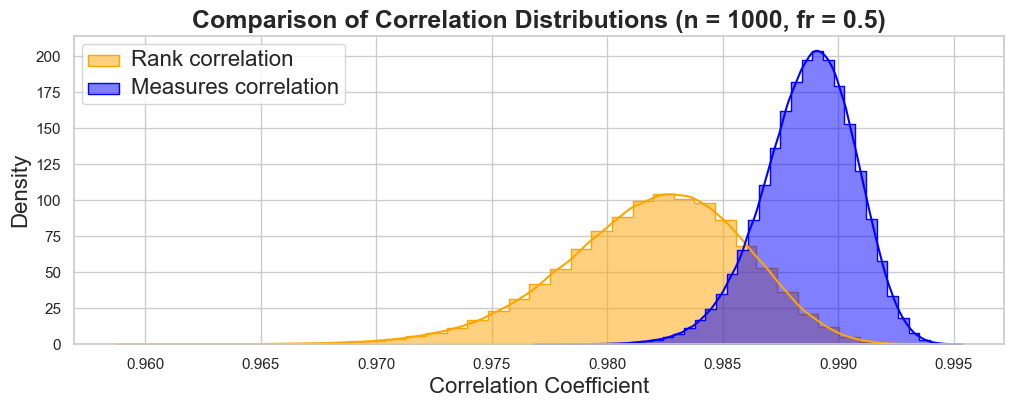

In [19]:
sns.set(style="whitegrid")

# Create a figure and axis with seaborn
plt.figure(figsize=(12, 4))

# Plotting the histograms with seaborn
sns.histplot(flat_corr_values_rank, bins=40, color='orange', kde=True, label='Rank correlation', element='step', stat='density')
sns.histplot(flat_corr_values_measure, bins=40, color='blue', kde=True, label='Measures correlation', element='step', stat='density')

# Adding labels and title
plt.xlabel('Correlation Coefficient', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Comparison of Correlation Distributions (n = 1000, fr = 0.5)', fontsize=18, fontweight='bold')

# Adding a legend with increased font size
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(16)  # Adjust the font size as needed

# Save the plot
plt.savefig('/Users/munisabakhromova/Desktop/correlation_histogram.png')

# Display the histogram
plt.show()

In [11]:
num_samples = 1000
fraction = 0.1
pref="patience"

def random_sampling_pref_(data, preference, num_samples, fraction):
   
   # Initialize an empty DataFrame to store the results
   df_ = pd.DataFrame()   
   sampled_data_ = pd.DataFrame()
   
   # Repeat the sampling process for a specified number of iterations
   for i in range(num_samples):
      # Group by 'country' and sample half of the observations with replacement
      sampled_data_ = data.groupby("country")[preference].apply(lambda x: x.sample(frac=fraction, replace=True)).reset_index(level=1,drop=True)
      sampled_data_.name = f"{preference}_{i+1}"
      
      # Concatenate the sampled data to the result DataFrame
      df_ = pd.concat([df_, sampled_data_], axis=1)

   return df_

pref_samples_ = random_sampling_pref_(merged_data,preference=pref, num_samples=num_samples, fraction=fraction)
pref_samples_

,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,patience_10,...,patience_991,patience_992,patience_993,patience_994,patience_995,patience_996,patience_997,patience_998,patience_999,patience_1000
Afghanistan,-0.29,-1.31,-0.04,-0.80,-0.42,-0.80,-0.29,-0.46,-0.93,-1.06,...,-0.04,-0.04,-0.29,-0.55,-0.17,-0.68,-0.04,-0.93,0.67,-0.04
Afghanistan,2.64,0.15,-1.31,-0.68,-0.08,-0.29,-0.76,-0.17,-0.68,-0.42,...,-0.17,-1.19,-1.06,-0.04,0.68,0.14,0.67,-0.29,-0.04,-0.70
Afghanistan,1.33,-0.29,-0.29,-0.55,-0.42,1.87,-0.68,-0.80,-0.29,-0.42,...,-0.40,-0.55,-0.04,-0.55,-0.68,0.79,2.76,0.20,-0.29,0.13
Afghanistan,-0.61,0.27,-0.80,-0.93,-0.17,-1.31,-0.80,-0.55,-0.93,-0.68,...,0.87,-0.04,-0.29,0.68,-0.04,-0.17,0.59,-0.42,-0.68,-0.17
Afghanistan,-0.04,-0.55,-0.04,-0.04,-0.55,-1.31,-1.19,-0.80,-0.04,-0.61,...,-1.31,1.41,2.76,-0.79,0.67,-1.31,-1.06,-0.04,-1.31,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,-0.68,-0.55,-0.42,-0.55,-0.04,-0.42,1.87,-0.55,-0.04,-0.42,...,-0.29,0.59,-0.55,-0.04,-0.68,-0.17,0.61,-0.29,-0.04,-0.55
Zimbabwe,0.67,-0.04,-1.19,-0.55,-0.93,-0.04,-0.04,-0.80,-0.29,-0.55,...,-0.68,-0.04,-0.04,-0.93,-1.31,-0.68,-0.04,-0.93,-0.29,-0.42
Zimbabwe,-1.19,-0.29,-0.55,-0.68,-0.04,0.47,-0.93,0.21,-0.68,-0.17,...,2.11,-1.06,-0.42,-0.55,-0.29,1.32,-0.55,-0.42,-0.55,0.68
Zimbabwe,1.10,-0.42,0.50,-0.24,-0.61,0.96,-0.42,-1.06,-0.55,-0.80,...,-0.42,-0.29,-0.17,-0.04,-0.17,0.07,-0.04,-0.04,-0.04,-0.80


In [12]:
def generate_pref_measure_sample(data):
    patience_sample = pd.DataFrame(data.reset_index().rename(columns={'index': 'country'}).groupby(['country']).mean())
    return patience_sample
pref_measure_samples_ = generate_pref_measure_sample(pref_samples_)
pref_measure_samples_

,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,patience_10,...,patience_991,patience_992,patience_993,patience_994,patience_995,patience_996,patience_997,patience_998,patience_999,patience_1000
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.10,-0.26,-0.13,-0.21,-0.22,-0.26,-0.31,-0.16,-0.31,-0.22,...,-0.20,-0.23,-0.19,-0.21,-0.25,-0.28,-0.15,-0.24,-0.27,-0.23
Algeria,0.32,0.06,-0.02,0.12,-0.08,0.13,-0.00,0.08,0.17,0.10,...,-0.07,0.03,0.17,0.06,0.09,0.31,0.14,0.05,0.11,0.26
Argentina,-0.34,-0.29,-0.29,-0.22,-0.36,-0.38,-0.24,-0.28,-0.11,-0.09,...,-0.17,-0.32,-0.31,-0.21,-0.24,-0.14,-0.22,-0.27,-0.28,-0.18
Australia,0.82,0.65,0.74,0.75,0.69,0.51,0.81,0.74,0.61,0.58,...,0.75,0.86,0.79,0.75,0.79,0.97,0.71,0.63,0.81,0.72
Austria,0.53,0.51,0.69,0.50,0.50,0.34,0.53,0.63,0.43,0.37,...,0.62,0.62,0.50,0.46,0.42,0.69,0.53,0.61,0.37,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,0.72,0.61,0.54,0.40,0.59,0.57,0.60,0.46,0.62,0.46,...,0.38,0.51,0.60,0.69,0.70,0.74,0.58,0.65,0.31,0.41
United States,0.77,0.66,0.89,0.94,0.79,0.85,0.75,0.84,0.94,0.90,...,1.08,0.82,0.56,1.06,0.88,0.93,0.89,0.69,0.86,0.94
Venezuela,-0.27,-0.26,-0.32,-0.30,-0.21,-0.34,-0.27,-0.28,-0.19,-0.16,...,-0.37,-0.28,-0.19,-0.33,-0.23,-0.09,-0.26,-0.33,-0.25,-0.27


In [13]:
pref_rank_samples_ = pd.DataFrame()  
for i in pref_measure_samples.columns:
    pref_rank_samples_[i] = pref_measure_samples_[i].rank(ascending=False, method='min')
    pref_rank_samples_[i] = pref_rank_samples_[i].round().astype(pd.Int8Dtype())
pref_rank_samples_

,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,patience_10,...,patience_991,patience_992,patience_993,patience_994,patience_995,patience_996,patience_997,patience_998,patience_999,patience_1000
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,38,53,43,48,50,52,62,46,63,54,...,49,55,49,52,57,57,42,49,54,55
Algeria,16,26,32,25,36,23,29,25,22,27,...,37,29,19,27,26,14,21,27,23,17
Argentina,67,56,58,53,63,67,52,57,43,40,...,44,63,62,51,55,47,49,56,55,48
Australia,3,5,5,6,6,9,4,6,8,8,...,4,3,5,5,6,3,5,8,5,7
Austria,11,10,7,10,10,12,10,8,12,14,...,7,8,10,12,13,7,9,9,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,6,6,11,13,7,6,8,10,5,11,...,12,12,7,6,7,6,6,6,16,14
United States,5,4,3,3,5,4,7,3,3,3,...,3,5,8,2,5,5,3,5,4,3
Venezuela,55,54,62,63,49,65,56,56,48,45,...,66,58,47,62,52,42,58,62,52,58


In [14]:
corr_results_rank_ = pref_rank_samples_.iloc[:, 0:].corr()
np.fill_diagonal(corr_results_rank_.values, np.nan)
corr_results_rank_

,patience_1,patience_2,patience_3,patience_4,patience_5,patience_6,patience_7,patience_8,patience_9,patience_10,...,patience_991,patience_992,patience_993,patience_994,patience_995,patience_996,patience_997,patience_998,patience_999,patience_1000
patience_1,NaN,0.94,0.91,0.90,0.91,0.93,0.93,0.92,0.91,0.93,...,0.93,0.94,0.91,0.92,0.92,0.92,0.92,0.90,0.92,0.92
patience_2,0.94,NaN,0.91,0.93,0.90,0.94,0.94,0.94,0.92,0.94,...,0.94,0.95,0.93,0.93,0.92,0.92,0.90,0.94,0.93,0.91
patience_3,0.91,0.91,NaN,0.89,0.91,0.90,0.90,0.91,0.92,0.92,...,0.92,0.94,0.90,0.92,0.90,0.93,0.90,0.92,0.89,0.94
patience_4,0.90,0.93,0.89,NaN,0.86,0.90,0.92,0.91,0.90,0.93,...,0.90,0.93,0.90,0.93,0.88,0.90,0.88,0.90,0.90,0.91
patience_5,0.91,0.90,0.91,0.86,NaN,0.91,0.91,0.91,0.91,0.92,...,0.92,0.93,0.91,0.94,0.92,0.90,0.87,0.94,0.91,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
patience_996,0.92,0.92,0.93,0.90,0.90,0.92,0.93,0.90,0.92,0.94,...,0.91,0.92,0.90,0.92,0.90,NaN,0.92,0.90,0.91,0.94
patience_997,0.92,0.90,0.90,0.88,0.87,0.89,0.93,0.88,0.91,0.91,...,0.90,0.90,0.89,0.90,0.90,0.92,NaN,0.89,0.89,0.89
patience_998,0.90,0.94,0.92,0.90,0.94,0.93,0.92,0.94,0.91,0.92,...,0.93,0.94,0.93,0.93,0.91,0.90,0.89,NaN,0.91,0.90
patience_999,0.92,0.93,0.89,0.90,0.91,0.92,0.91,0.92,0.90,0.94,...,0.94,0.93,0.92,0.94,0.91,0.91,0.89,0.91,NaN,0.90


In [15]:
flat_corr_values_rank_ = corr_results_rank_.values.flatten()
flat_corr_values_rank_ = flat_corr_values_rank_[~np.isnan(flat_corr_values_rank_)]

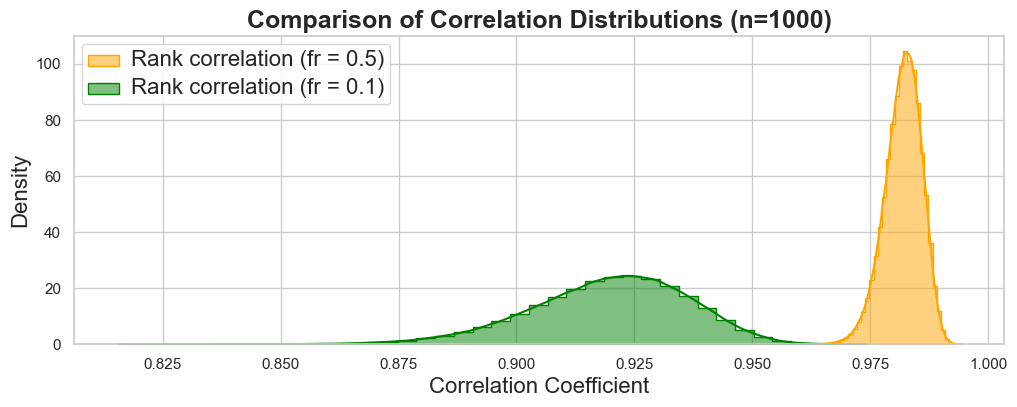

In [21]:
sns.set(style="whitegrid")

# Create a figure and axis with seaborn
plt.figure(figsize=(12, 4))

# Plotting the histograms with seaborn
sns.histplot(flat_corr_values_rank, bins=40, color='orange', kde=True, label='Rank correlation (fr = 0.5)', element='step', stat='density')
sns.histplot(flat_corr_values_rank_, bins=40, color='green', kde=True, label='Rank correlation (fr = 0.1)', element='step', stat='density')

# Adding labels and title
plt.xlabel('Correlation Coefficient', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.title('Comparison of Correlation Distributions (n=1000)', fontsize=18, fontweight='bold')

# Adding a legend with increased font size
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontsize(16)  # Adjust the font size as needed

# Save the plot
plt.savefig('/Users/munisabakhromova/Desktop/correlation_histogram1.png')

# Display the histogram
plt.show()
